In [17]:
#Importando as bibliotexas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

# **1- Carregue o dataset e exiba as 10 primeiras linhas.**

In [5]:
#Carregar o dataset
##sep=";" -> mostra que o separador dos dados é o ";"
df = pd.read_csv("household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

#Exibir as 10 primeira linhas
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


# **2- Explique a diferença entre as variáveis Global_active_power e Global_reactive_power**

R: A diferença entre as variaveis são que a energia active_power(ativa) é a energia que de fato é utilizada e consumida pelos aparelhos de casa para que eles consigam fazer suas funções devidamente, como a função de esquentar a água de um chuveiro, já a reactive_power(reativa) é a energia que apenas circula entre alguns equipamentos e a rede elétrica para manter o funcionamento de alguns equipamentos, como por exemplo uma máquina de lavar que precisa criar o campo magnético no motor para ele fazer o tambor girar, e essa energia não aparece na conta de luz na sua casa.

# **3- Verifique se existem valores ausentes no dataset. Quantifique-os.**


In [ ]:
#Verificar se existem valores nulos
missing_values = df.isnull().sum()

#Mostrando a quantidade total de valores nulos por coluna
print("Valores nulos por coluna:")
missing_values


Valores nulos por coluna:


,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
#Mostrando o total de todos os dados de valores nulos
f"\nTotal de valores nulos no dataset: {missing_values.sum()}"

'\nTotal de valores nulos no dataset: 181853'

# **4- Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente**

In [ ]:
#Mudar a coluna Date para datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

#Criar nova coluna com o dia da semana correspondente
df["Weekday"] = df["Date"].dt.day_name()

# Visualizar as 10 primeiras linhas para conferir
df[["Date", "Weekday"]].head(10)

,Date,Weekday
0,2006-12-16,Saturday
1,2006-12-16,Saturday
2,2006-12-16,Saturday
3,2006-12-16,Saturday
4,2006-12-16,Saturday
5,2006-12-16,Saturday
6,2006-12-16,Saturday
7,2006-12-16,Saturday
8,2006-12-16,Saturday
9,2006-12-16,Saturday


# **5- Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power**

In [ ]:
#Verificando se a coluna relamente está com o formato de Datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

#Filtrando apenas os registros de 2007
df_2007 = df[df["Date"].dt.year == 2007]

#Calculando a média diária de active_power
media_diaria = df_2007.groupby("Date")["Global_active_power"].mean()

#Mostrando as 10 primeiras médias
media_diaria.head(10)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
2007-01-06,1.047485
2007-01-07,1.699736
2007-01-08,1.556500
2007-01-09,1.297954


# **6- Gráfico de linha da variação de Global_active_power em um único dia**

/tmp/ipython-input-4027626417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia["Datetime"] = pd.to_datetime(df_dia["Date"].astype(str) + " " + df_dia["Time"])


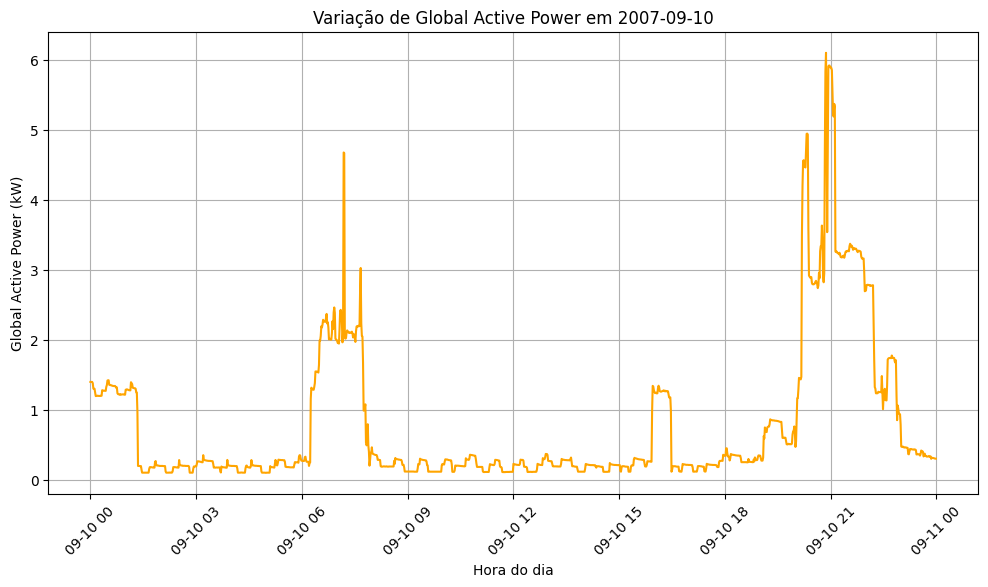

In [ ]:
#Filtrando um único dia
dia_escolhido = "2007-09-10"
df_dia = df_2007[df_2007["Date"] == dia_escolhido]

#Crinado uma coluna datetime para o eixo X
df_dia["Datetime"] = pd.to_datetime(df_dia["Date"].astype(str) + " " + df_dia["Time"])

#Gráfico de linha
plt.figure(figsize=(12,6))
plt.plot(df_dia["Datetime"], df_dia["Global_active_power"], color="orange")
plt.title(f"Variação de Global Active Power em {dia_escolhido}")
plt.xlabel("Hora do dia")
plt.ylabel("Global Active Power (kW)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

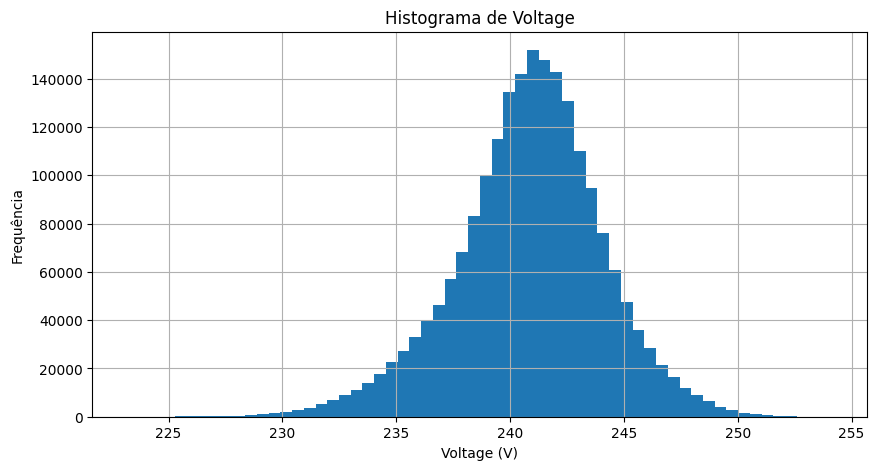

In [ ]:
#Garantindo que a coluna seja do tipo numérico
df["Voltage"] = pd.to_numeric(df["Voltage"], errors="coerce")

#Histograma
s = df["Voltage"].dropna()
plt.figure(figsize=(10,5))
plt.hist(s, bins=60)
plt.title("Histograma de Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

Podemos observar a partir do gráfico que a variavel Voltage normalmente fica concentrada em 241V, podendo ver também que a distruição faz uma tendência maior para o lado dos valores mais baixos e isso significa que nesse caso tem um pouco mais de queadas do que picos, mas mesmo assim é possivel analisar que os valores na maioria das vezes ficam localizados perto do centro.

# **8. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [ ]:
#Deixando as colunas no tipo correto
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

#Mantendo apenas as linhas válidas
df_valid = df.loc[df["Global_active_power"].notna() & df["Date"].notna(), ["Date", "Global_active_power"]].copy()

#Mostrando o consumo mensal em kWh
consumo_mensal_kwh = ( df_valid.groupby(df_valid["Date"].dt.to_period("M"))["Global_active_power"].sum(min_count=1) / 60.0 )

#Deixando em timestamp os indices
consumo_mensal_kwh.index = consumo_mensal_kwh.index.to_timestamp()
consumo_mensal_kwh = consumo_mensal_kwh.dropna()

#Consumo médio mensal
consumo_medio_mensal_kwh = consumo_mensal_kwh.mean()

#Formatando a resposta com a variavel de calculo de consumo medio
f"Consumo médio por mês: {float(consumo_medio_mensal_kwh):.2f} kWh"

'Consumo médio por mês: 776.74 kWh'

# **9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [ ]:
#Deixando as colunas no tipo correto
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")

#Mantendo apenas as linhas válidas
df_valid = df.loc[df["Global_active_power"].notna() & df["Date"].notna(), ["Date", "Global_active_power"]].copy()

#Calculando o consumo diario do dataser
consumo_diario_kwh = ( df_valid.groupby("Date")["Global_active_power"].sum(min_count=1) / 60.0 )

#Definindo a variavel com o dia que teve o máximo consumo e seu valor
dia_max = consumo_diario_kwh.idxmax()
valor_max = consumo_diario_kwh.loc[dia_max]

#Formatando a resposta com a variavel do dia e o valor que teve o consumo máximo do dataset
f"Dia com maior consumo: {dia_max.date()} | Consumo (kWh): {float(valor_max):.2f}"

'Dia com maior consumo: 2006-12-23 | Consumo (kWh): 79.56'

# **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [ ]:
#Deixando as colunas no tipo correto
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")

#Mantendo apenas as linhas válidas
df_valid = df.loc[df["Date"].notna() & df["Global_active_power"].notna(), ["Date","Global_active_power"]].copy()

#Calculando o consumo diario do dataser
consumo_diario_kwh = df_valid.groupby("Date")["Global_active_power"].sum(min_count=1) / 60.0

#Classificando dias de semana e final de semana
tipo_dia = pd.Series( np.where(consumo_diario_kwh.index.weekday < 5, "Semana", "Fim de semana"), index=consumo_diario_kwh.index, name="Tipo" )

#Calculando a media de consumo diário por dia de semana de final de semana separadamente
comparacao = consumo_diario_kwh.groupby(tipo_dia).agg(["mean","std","count"]).round(2)
comparacao.columns = ["media_kWh_dia", "desvio-padrao_kWh_dia", "numero_dias"]

print(comparacao)

#Diferenca o percentual
means = consumo_diario_kwh.groupby(tipo_dia).mean()
if {"Semana","Fim de semana"}.issubset(means.index):
    diferenca_pct = (means["Semana"] - means["Fim de semana"]) / means["Fim de semana"] * 100
    print(f"\nA diferença relativa entre final de semana e dias de semana é: {diferenca_pct:.2f}%")

               media_kWh_dia  desvio-padrao_kWh_dia  numero_dias
Tipo                                                            
Fim de semana          29.18                  12.33          408
Semana                 24.76                   8.78         1025

A diferença relativa entre final de semana e dias de semana é: -15.17%


essa resposta mostra que os dias de semana consomem -21.04% a menos que os fins de semana.

# **11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.**

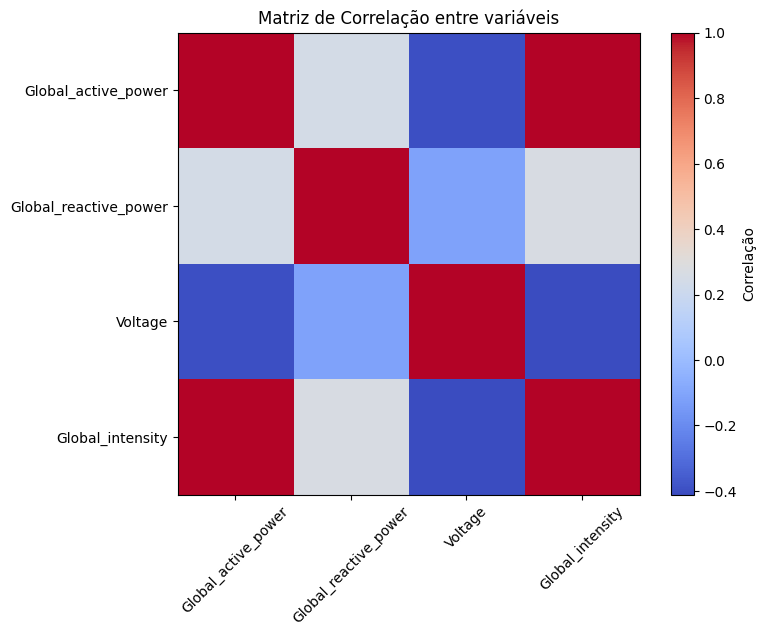

In [ ]:
#Mantendo apenas as linhas válidas
colunas_corr = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_corr = df[colunas_corr]

# Calculando correlação
correlacao = df_corr.corr()

#Mostrando a correlação
"Matriz de correlação:"
correlacao

#Mostrando essa comparacao em um mapa de calor
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(correlacao, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlação')
plt.xticks(range(len(colunas_corr)), colunas_corr, rotation=45)
plt.yticks(range(len(colunas_corr)), colunas_corr)
plt.title("Matriz de Correlação entre variáveis")
plt.show()

Podemos observar que a partir do gráfico, a potência ativa e a intensidade da corrente andam praticamente juntas, então quando a potência ativa aumenta a intensidade também aumenta quase na mesma proporção, por isso a correlação entre elas é bem próxima de 1. Já a potência reativa tem uma relação moderada com essas duas, porque representa a parte da energia que oscila mas não é realmente consumida, então não acompanha tão diretamente as variações. A tensão costuma variar bem pouco e de forma mais independente, por isso sua correlação com as outras variáveis geralmente é baixa, ficando perto de zero.

# **12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.**

In [ ]:
#Criando a variável
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

#Confirmando se realmente foi criada a variavel
df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Total_Sub_metering"]].head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0


# **13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power**

In [ ]:

#Calculando a média de Global_active_power
media_gap = df["Global_active_power"].mean()

#Conferindo se o formato esta correto em datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

#Coluna mes/ano
df["MesAno"] = df["Date"].dt.to_period("M")

#Calculando a media de Total_Sub_metering por mês
total_mes = df.groupby("MesAno")["Total_Sub_metering"].mean()

#Fazendo a comparação para ver quais meses ultrapassam a media
meses_ultrapassam = total_mes[total_mes > media_gap]

f"Média de Global_active_power:", media_gap
"\nMeses em que Total_Sub_metering ultrapassa a média de Global_active_power:"
meses_ultrapassam

,Total_Sub_metering
MesAno,
2006-12,10.873181
2007-01,10.423518
2007-02,9.486135
2007-03,10.212863
2007-04,6.839375
2007-05,8.452442
2007-06,7.379151
2007-07,5.697724
2007-08,6.979336


# **14. Faça um gráfico de série temporal do Voltage para o ano de 2008.**

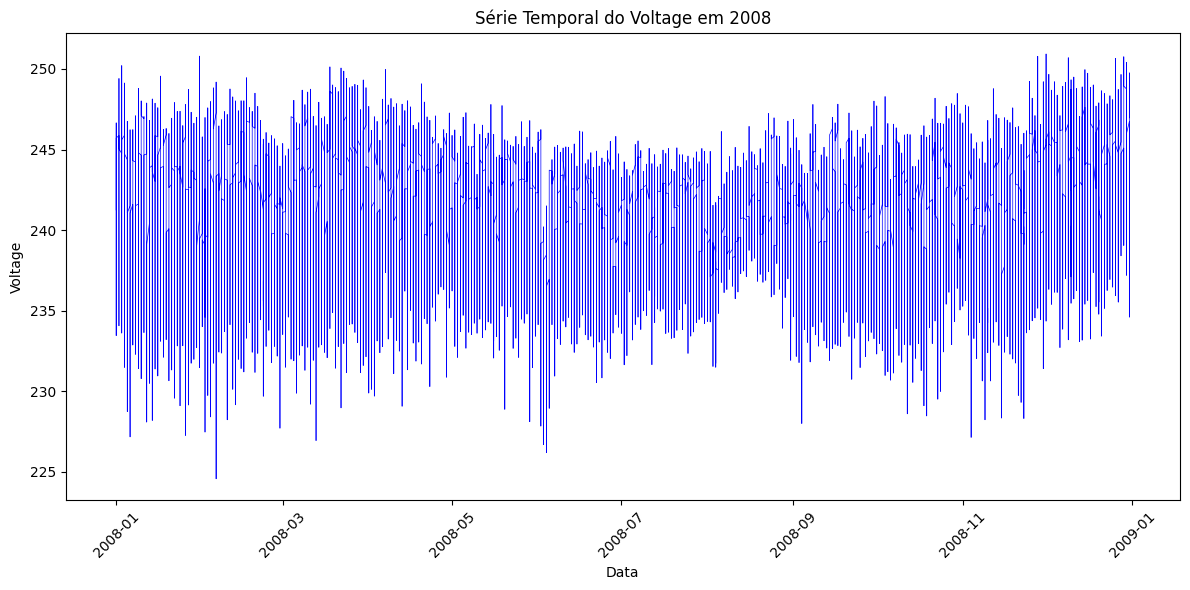

In [ ]:
#Conferindo se o formato esta correto em datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

#Filtrando só o ano de 2008
df_2008 = df[df["Date"].dt.year == 2008]

# Criando o gráfico
plt.figure(figsize=(12,6))
plt.plot(df_2008["Date"], df_2008["Voltage"], color="blue", linewidth=0.5)
plt.title("Série Temporal do Voltage em 2008")
plt.xlabel("Data")
plt.ylabel("Voltage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).**

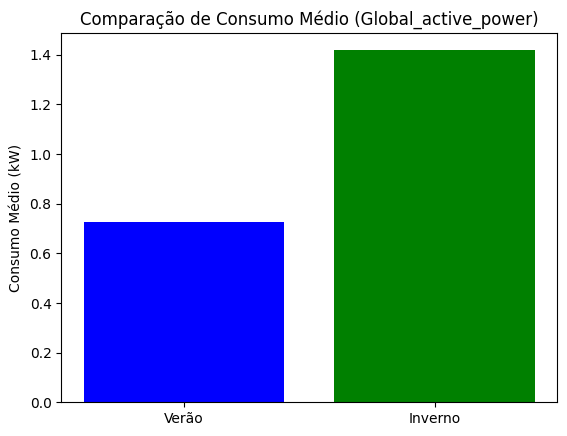

In [ ]:
#Conferindo se o formato esta correto em datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

#Criando a coluna Month
df["Month"] = df["Date"].dt.month

#Definindo quais meses sao verão e inverno
verao = [6, 7, 8]
inverno = [12, 1, 2]

#Filtrando os dados das estaçoes
df_verao = df[df["Month"].isin(verao)]
df_inverno = df[df["Month"].isin(inverno)]

# Calculando a média de consumo (Global_active_power)
media_verao = df_verao["Global_active_power"].mean()
media_inverno = df_inverno["Global_active_power"].mean()

f"Consumo médio no Verão:", media_verao
f"Consumo médio no Inverno:", media_inverno


#Gráfico comparando os dados das estacoes
plt.bar(["Verão", "Inverno"], [media_verao, media_inverno], color=["blue", "green"])
plt.title("Comparação de Consumo Médio (Global_active_power)")
plt.ylabel("Consumo Médio (kW)")
plt.show()

# **16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.**

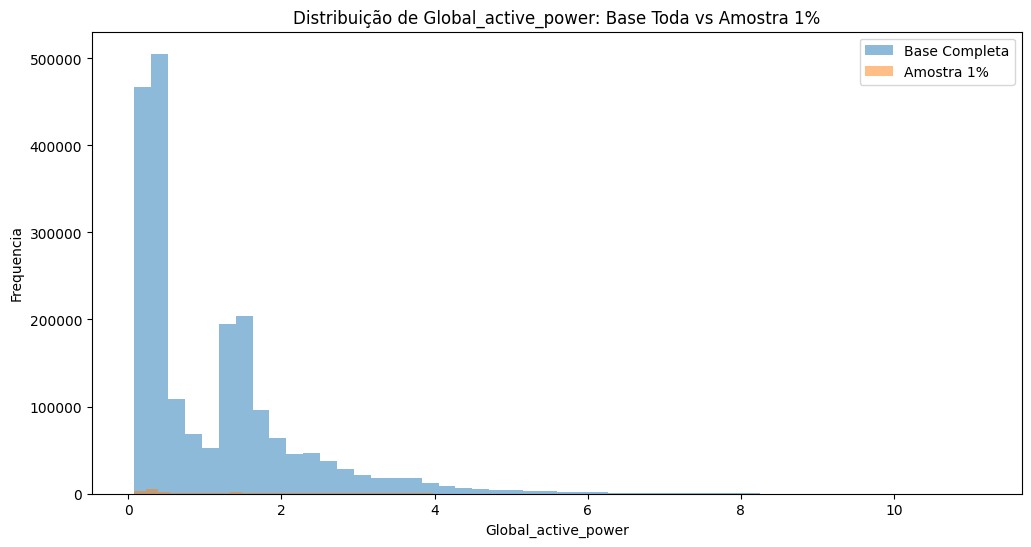

In [ ]:
#Fazendo a amostragem aleatória de 1%
df_sample = df.sample(frac=0.01, random_state=42)

#Criando os histogramas
plt.figure(figsize=(12,6))

plt.hist(df["Global_active_power"].dropna(), bins=50, alpha=0.5, label="Base Completa")

plt.hist(df_sample["Global_active_power"].dropna(), bins=50, alpha=0.5, label="Amostra 1%")

plt.title("Distribuição de Global_active_power: Base Toda vs Amostra 1%")
plt.xlabel("Global_active_power")
plt.ylabel("Frequencia")
plt.legend()
plt.show()

# **17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais**

In [ ]:
#Pegando apenas as variaveis que são numericas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Criando o scaler
scaler = MinMaxScaler()

#Fazendo a transformação
df_normalizado = df.copy()
df_normalizado[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#Mostrando as primeiras linhas
df_normalizado.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Weekday,Total_Sub_metering,MesAno,Month
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,0.134328,2006-12,12
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,0.126866,2006-12,12
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,0.141791,2006-12,12
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,0.134328,2006-12,12
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,0.134328,2006-12,12


# **18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


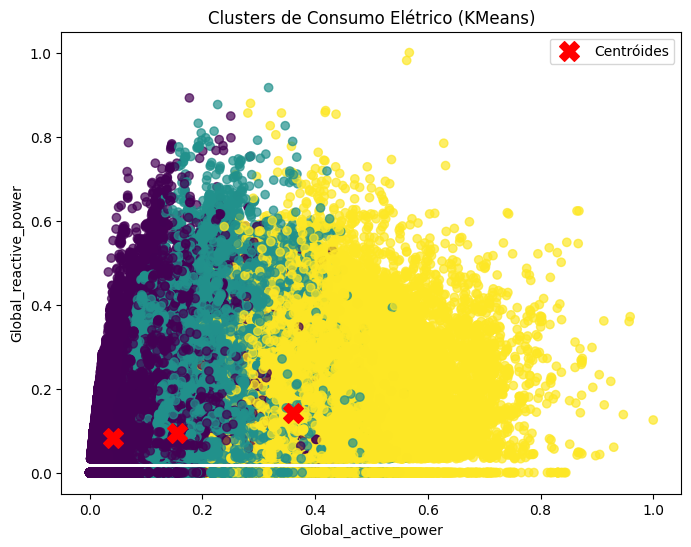

In [ ]:
#Pegando apenas as colunas que são numericas
numeric_cols = df_normalizado.select_dtypes(include=['float64', 'int64']).columns

#Criando imputador para substituir NaN pela média
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(df_normalizado[numeric_cols])

#Aplicando KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

#Deixnado os clusters salvos no DataFrame original
df_normalizado['Cluster'] = clusters

# Distribuição dos dias por cluster
"Distribuição dos dias em cada cluster:"
df_normalizado['Cluster'].value_counts()

#Mostrando os centróides dos clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=numeric_cols)
"\nCentróides dos clusters (normalizados):"
centroids

#Mostrando usando as duas primeiras variáveis numéricas
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centróides')
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.title("Clusters de Consumo Elétrico (KMeans)")
plt.legend()
plt.show()

A partir do gráfico da pra verque existem padrões diferentes de uso de energia ao longo do tempo, e isso pode ajudar a entender melhor os hábitos de consumo, conseguimos descobrir isso pois com o K-Means conseguimos separar os dias em 3 grupos de consumo. O primeiro grupo ficou com os dias de menor gasto de energia, o segundo representa um consumo mais equilibrado (nem tão baixo nem tão alto), e o terceiro concentra os dias de maior consumo.

# **19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.**

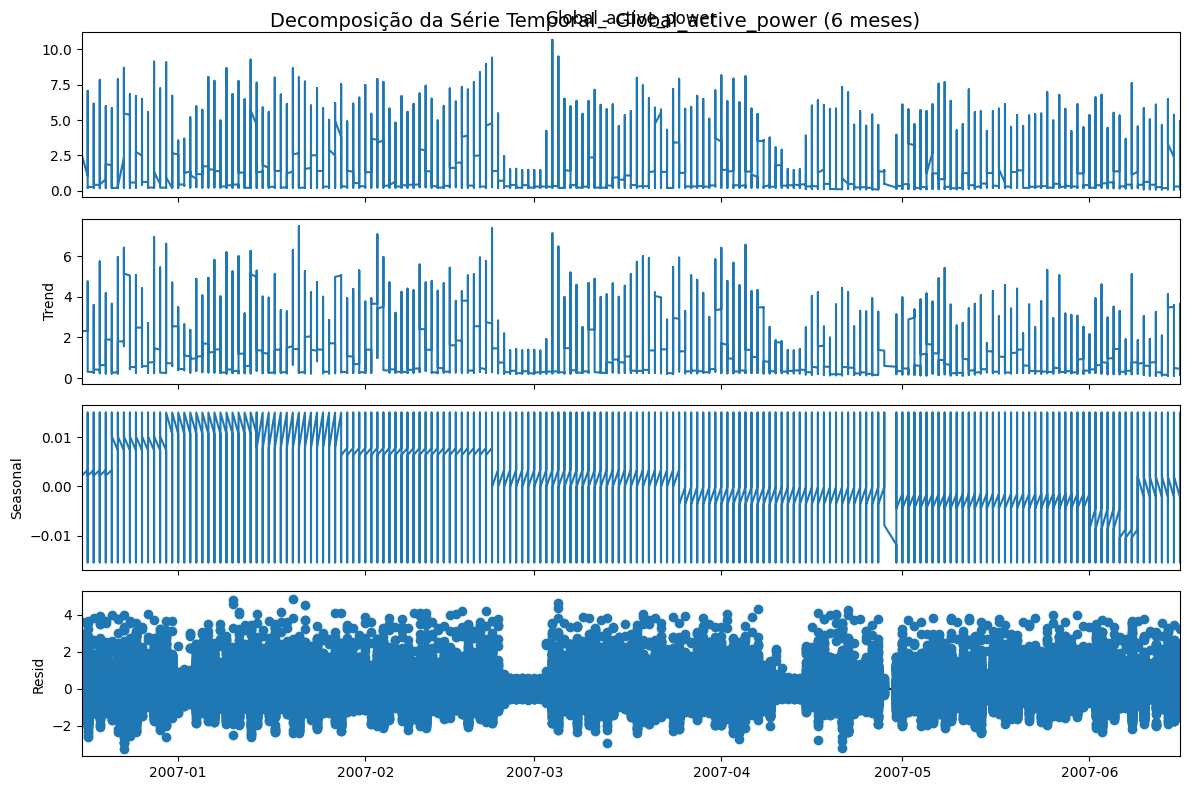

In [ ]:
#Conferindo se o formato esta correto em datetime
df['Date'] = pd.to_datetime(df['Date'])

#Definindo como indice a coluna de data
df = df.set_index('Date')

#Pegando os primeiros 6 meses
seis_meses = df.loc[df.index.min(): df.index.min() + pd.DateOffset(months=6)]

#Decompondo a série temporal
decomposicao = seasonal_decompose(seis_meses['Global_active_power'].dropna(), model='additive', period=30)

#Mostrnado os componentes
plt.rcParams.update({'figure.figsize': (12,8)})
decomposicao.plot()
plt.suptitle("Decomposição da Série Temporal - Global_active_power (6 meses)", fontsize=14)
plt.show()

# **20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo**

Erro Médio Absoluto (MAE): 0.033697665618487194
Erro Quadrático Médio (MSE): 0.0024523324959871986
Raiz do Erro Quadrático Médio (RMSE): 0.04952103084536103


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


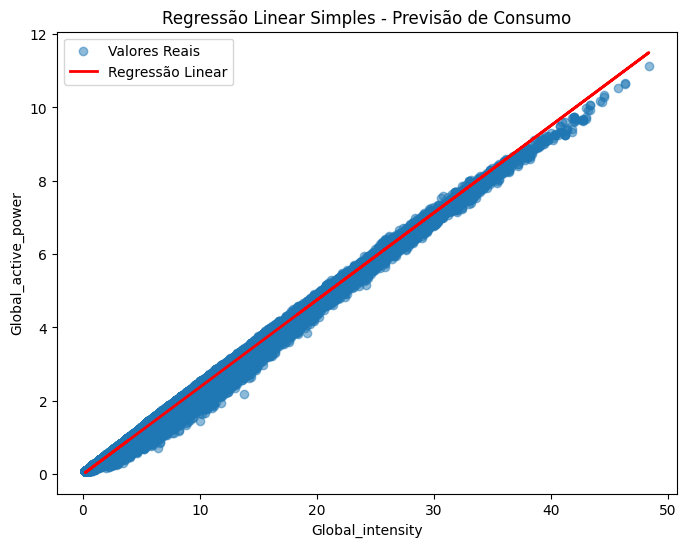

In [ ]:
# Imputação para tratar NaNs
imputer = SimpleImputer(strategy="mean")

X = imputer.fit_transform(df[['Global_intensity']])
y = imputer.fit_transform(df[['Global_active_power']]).ravel()

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Realizando as previsões
y_pred = modelo.predict(X)

# Avaliando o erro
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Erro Médio Absoluto (MAE):", mae)
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)

# Mostrando a reta de regressão
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5, label="Valores Reais")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regressão Linear")
plt.xlabel("Global_intensity")
plt.ylabel("Global_active_power")
plt.title("Regressão Linear Simples - Previsão de Consumo")
plt.legend()
plt.show()

 O erro calculado nos mostra o quão distante o modelo fica de valores reais, mas mesmo assim já consegue nos dar uma boa noção da relação linear entre as variáveis. O modelo ajustou uma reta que relaciona a intensidade elétrica com o consumo de energia. Como era esperado quanto maior o valor da Global_intensity, maior tende a ser o Global_active_power.

# **21. Séries temporais por hora**

/tmp/ipython-input-3359006670.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
/tmp/ipython-input-3359006670.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df['Global_active_power'].resample('1H').mean()


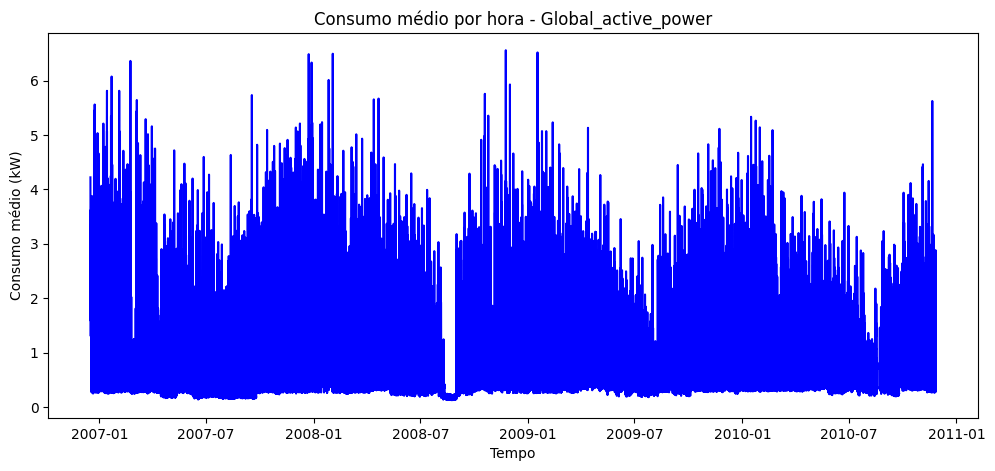

Média por hora do dia:
Datetime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
Name: Global_active_power, dtype: float64


In [7]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('Datetime', inplace=True)

# Reamostragem por hora
hourly = df['Global_active_power'].resample('1H').mean()

plt.figure(figsize=(12,5))
plt.plot(hourly, color='blue')
plt.title("Consumo médio por hora - Global_active_power")
plt.xlabel("Tempo")
plt.ylabel("Consumo médio (kW)")
plt.show()

# Identificar horários de maior consumo médio
hourly_mean_by_hour = hourly.groupby(hourly.index.hour).mean()
print("Média por hora do dia:")
print(hourly_mean_by_hour.sort_values(ascending=False).head())

# **22. Autocorrelação do consumo**

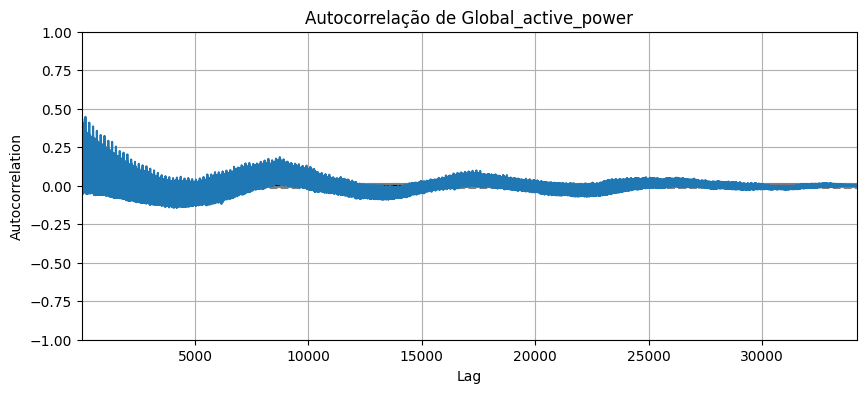

Correlação 1h: 0.7134555946916454
Correlação 24h: 0.4359072259119912
Correlação 48h: 0.40126926204501584


In [8]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,4))
autocorrelation_plot(hourly.dropna())
plt.title("Autocorrelação de Global_active_power")
plt.show()

print("Correlação 1h:", hourly.autocorr(lag=1))
print("Correlação 24h:", hourly.autocorr(lag=24))
print("Correlação 48h:", hourly.autocorr(lag=48))

# **23. PCA**

Variância explicada: [0.75442158 0.24513217]


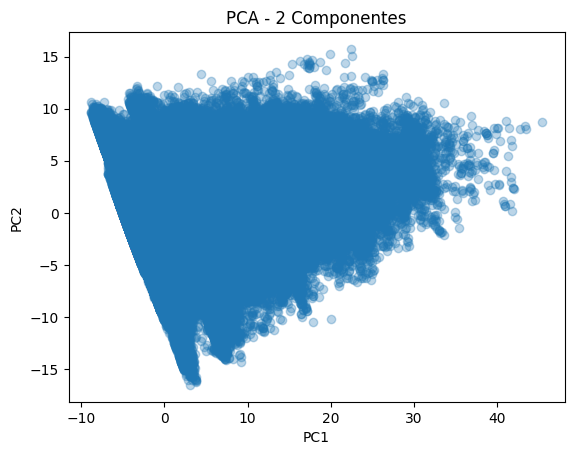

In [12]:
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
X = df[features].dropna()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

print("Variância explicada:", pca.explained_variance_ratio_)

plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3)
plt.title("PCA - 2 Componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# **24. Clusters no espaço PCA**

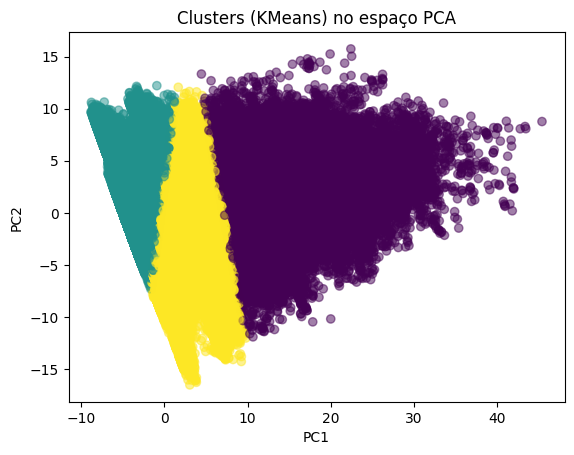

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Clusters (KMeans) no espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# **25. Regressão linear vs polinomial**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


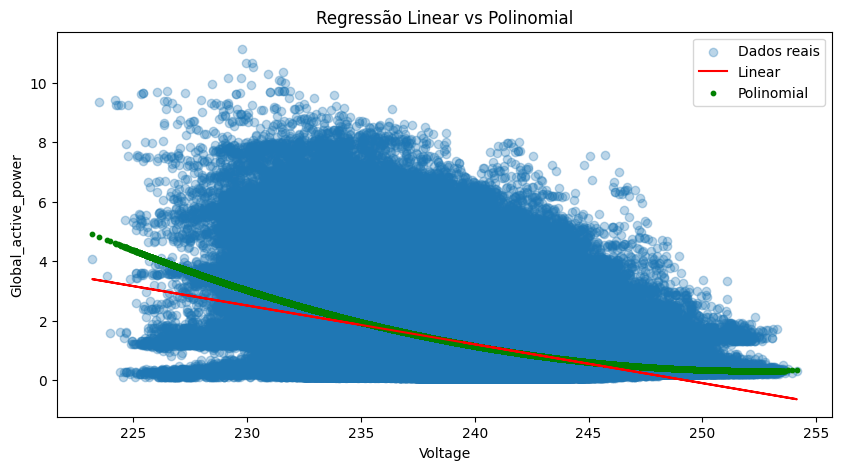

RMSE Linear: 0.9691
RMSE Polinomial: 0.9648


In [18]:
X_voltage = df[['Voltage']].dropna()
y_power = df['Global_active_power'].dropna()
X_voltage = X_voltage.loc[y_power.index]

# Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(X_voltage, y_power)
y_pred_lin = lin_reg.predict(X_voltage)
rmse_lin = np.sqrt(mean_squared_error(y_power, y_pred_lin))

# Regressão Polinomial (grau 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_voltage)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_power)
y_pred_poly = poly_reg.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y_power, y_pred_poly))

plt.figure(figsize=(10,5))
plt.scatter(X_voltage, y_power, alpha=0.3, label="Dados reais")
plt.plot(X_voltage, y_pred_lin, color='red', label="Linear")
plt.scatter(X_voltage, y_pred_poly, color='green', s=10, label="Polinomial")
plt.title("Regressão Linear vs Polinomial")
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.legend()
plt.show()

print(f"RMSE Linear: {rmse_lin:.4f}")
print(f"RMSE Polinomial: {rmse_poly:.4f}")

# **26. Carregamento e inspeção inicial**

In [19]:
df = pd.read_csv('/content/energydata_complete.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# **27. Distribuição do consumo**

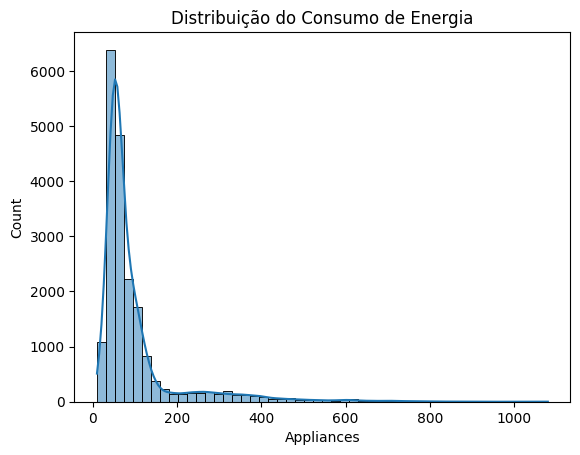

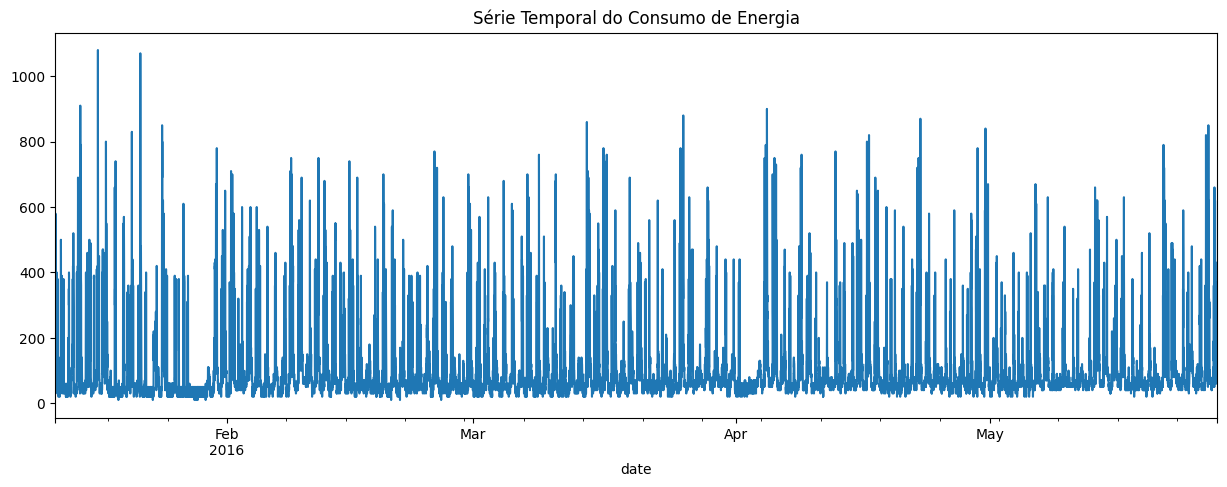

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribuição do Consumo de Energia')
plt.show()

df['date'] = pd.to_datetime(df['date'])
df.set_index('date')['Appliances'].plot(figsize=(15,5))
plt.title('Série Temporal do Consumo de Energia')
plt.show()
# R: O consumo se concentra em valores mais baixos, com picos em momentos raros.

# **27. Correlação com variáveis ambientais**

In [21]:
correlacoes = df.corr()['Appliances'].sort_values(ascending=False)
print(correlacoes)
# R: umidade interna, temperatura interna e iluminação tem maior relação com o consumo.

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
date          -0.009630
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


# **28. Normalização dos dados**

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include='number')), columns=df.select_dtypes(include='number').columns)

# **29. PCA**

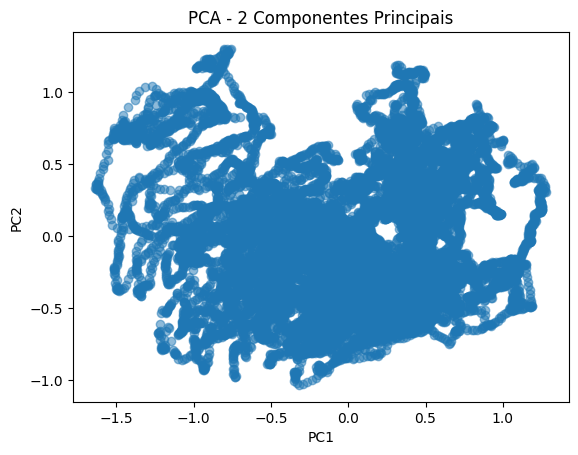

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title('PCA - 2 Componentes Principais')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# R: Somente agrupamentos naturais, especialmente em relação aos padrões de consumo por horário.

# **30. Regressão Linear Múltipla**

In [24]:
import statsmodels.api as sm

X = df_scaled.drop(columns='Appliances')
y = df_scaled['Appliances']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
# R: R² -> Baixo poder explicativo. RMSE -> Considerado relativamente alto.
#    Conclusão: modelo fraco para previsão.

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 01 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:30:22   Log-Likelihood:                 20061.
No. Observations:               19735   AIC:                        -4.007e+04
Df Residuals:                   19708   BIC:                        -3.985e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1673      0.020      8.318      

# **31. Random Forest Regressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor()
rf.fit(X.drop(columns='const'), y)
y_pred = rf.predict(X.drop(columns='const'))
rmse_rf = np.sqrt(mean_squared_error(y, y_pred))
print(f'RMSE Random Forest: {rmse_rf}')
# R: RMSE = 0.0236 -> Muito menor que da regressão linear.
#    Conclusão: Random Forest tem desempenho muito superior para previsão de consumo.

RMSE Random Forest: 0.02335114308268349


# **32. K-Means Clustering**

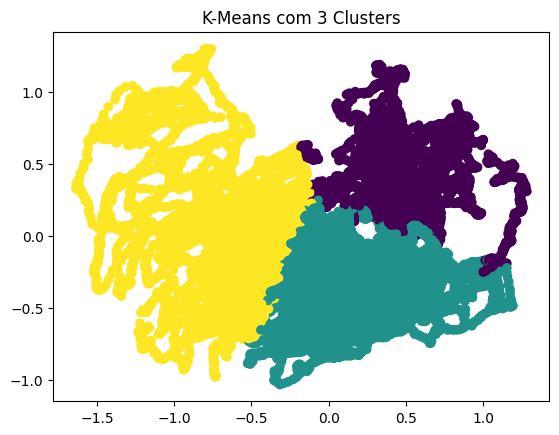

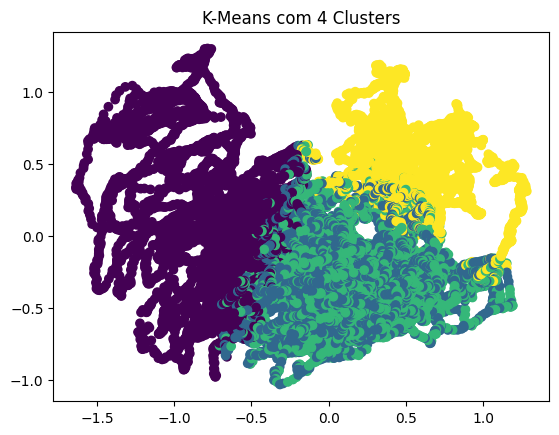

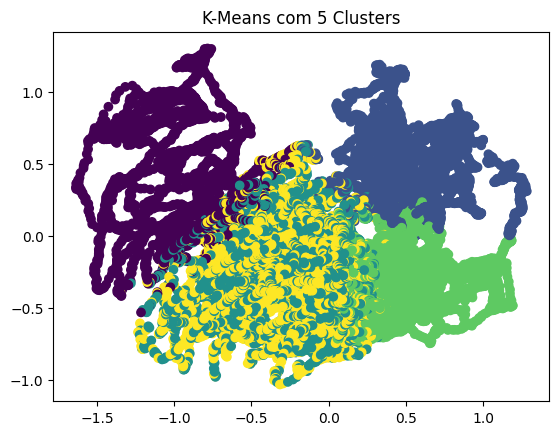

In [26]:
from sklearn.cluster import KMeans

for k in range(3, 6):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(df_scaled)
    plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis')
    plt.title(f'K-Means com {k} Clusters')
    plt.show()
# R: Perfis distintos, reforça o padrão natural nos dados.

# **33. Classificação binária**

In [27]:
df_scaled['consumo_binario'] = (df['Appliances'] > df['Appliances'].median()).astype(int)

# **34. Modelos de Classificação**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_class = df_scaled.drop(columns=['Appliances', 'consumo_binario'])
y_class = df_scaled['consumo_binario']

logreg = LogisticRegression()
logreg.fit(X_class, y_class)
y_pred_log = logreg.predict(X_class)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_class, y_class)
y_pred_rf = rf_clf.predict(X_class)

# **35. Avaliação**

In [30]:
print("Regressão Logística:")
print(confusion_matrix(y_class, y_pred_log))
print(classification_report(y_class, y_pred_log))

print("Random Forest:")
print(confusion_matrix(y_class, y_pred_rf))
print(classification_report(y_class, y_pred_rf))

# Falsos negativos: 2477 -> Casos de alto consumo classificados como baixo.
# Falsos positivos: 2196 -> Casos de baixo consumo classificados como alto.
# R: O modelo erra mais para baixo.

Regressão Logística:
[[8548 2196]
 [2477 6514]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     10744
           1       0.75      0.72      0.74      8991

    accuracy                           0.76     19735
   macro avg       0.76      0.76      0.76     19735
weighted avg       0.76      0.76      0.76     19735

Random Forest:
[[10744     0]
 [    0  8991]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10744
           1       1.00      1.00      1.00      8991

    accuracy                           1.00     19735
   macro avg       1.00      1.00      1.00     19735
weighted avg       1.00      1.00      1.00     19735

